In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Linear Regression

In [2]:
class LinearRegression:
        
    def forward(self, x):
    
        # shape(#samples, 1)
        return ((np.dot(x, self.weight)) + self.bias)
    
    def leastSquare(self, y, y_hat):
        
        # shape(#samples, 1)
        return (y_hat - y)**2
    
    def cost(self, y, y_hat):
        
        # scalar
        return (np.sum(self.leastSquare(y, y_hat)))/(2*y.shape[0])
        
    def train(self, x, y, alpha, epoch, random_state=-1):
        
        # x : shape(#samples, #features)
        # y : shape(#samples, 1)
        
        m, n = x.shape[0], x.shape[1]
        
        if random_state != -1:
            np.random.seed(random_state)
        
        # shape(#features, 1)
        self.weight = np.random.randn(n,1)

        # shape(1,1)
        self.bias = np.zeros((1,1))
        
        self.epoch = epoch
        
        self.cost_list = []
        
        for i in range(epoch):
            
            # shape(#samples, 1)
            y_hat = self.forward(x)
    
            # scalar
            loss = self.cost(y, y_hat)

            self.cost_list.append(loss)

            # Gradient
            # dL_dw : dLoss/dweight (#features, 1)
            dL_dw = (np.dot(x.T, (y_hat - y)))/m

            # dL_db : dLoss/dbias (1, 1)
            dL_db = np.sum((y_hat - y)/m)

            # shape(#features, 1)
            self.weight = self.weight - (alpha * dL_dw)

            # shape(1, 1)
            self.bias = self.bias - (alpha * dL_db)
            
    def plot_convergence(self):
        
        plt.plot([i for i in range(self.epoch)], self.cost_list)
        plt.xlabel('Epochs'); plt.ylabel('Mean Squared Error')
        
    def predict(self, x_test):
        
        # shape(#samples, 1)
        return self.forward(x_test)

### Utils

In [3]:
def randomDataset(m, n, random_state=-1):
    
    if random_state != -1:
        np.random.seed(random_state)
        
    x = np.random.randn(m, n)
    slope = np.random.randn(n, 1)
    epsilon = np.random.randn(1, 1)
    y = np.dot(x, slope) + epsilon
    print(slope, epsilon)
    
    return x, y

In [4]:
def train_test_split(x, y, size=0.2, random_state=-1):
    
    if random_state != -1:
        np.random.seed(random_state)
        
    x_val = x[:int(len(x)*size)]
    y_val = y[:int(len(x)*size)]
    x_train = x[int(len(x)*size):]
    y_train = y[int(len(x)*size):]
    
    return x_train, y_train, x_val, y_val

### Metrics

In [5]:
def rss(y, y_hat):
    
    return np.sum((y-y_hat)**2)

def tss(y):
    
    return np.sum((y-y.mean())**2)

def r2(y, y_hat):
    
    return (1 - (rss(y, y_hat)/tss(y)))

def rmse(y, y_hat):
    
    return np.sqrt(np.mean((y-y_hat)**2))

# Train Model on Dummy data

## Data Preparation

#### Create data

In [6]:
x, y = randomDataset(1000, 2, random_state=0)

[[-1.53292105]
 [-1.71197016]] [[0.04613506]]


#### Split data

In [7]:
x_train, y_train, x_val, y_val = train_test_split(x, y, size=0.2, random_state=0)

## Train

In [8]:
l = LinearRegression()

(array([[-1.52376821],
        [-1.70685461]]),
 array([[0.04697657]]))

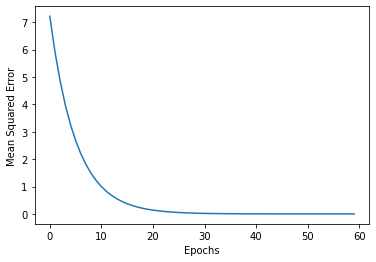

In [9]:
l.train(x_train, y_train, 0.1, 60, random_state=0)
l.plot_convergence()
l.weight, l.bias

## Evaluate on validation data

In [10]:
y_hat = l.predict(x_val)
print(rmse(y_val, y_hat), r2(y_val, y_hat))

0.010208016712526557 0.999978789105671


# Cross check with sklearn

## Train

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_, lr.intercept_)

[[-1.53292105 -1.71197016]] [0.04613506]


## Evaluate on validation data

In [16]:
y_hat = lr.predict(x_val)
print(rmse(y_val, y_hat), r2(y_val, y_hat))

7.284401114987283e-16 1.0


In [ ]:
lr.